# <font color='#2C3333'>Customer Segmentation with RFM (Recency, Frequence, Monetary)</font>

# <div align="center">
<img src="https://img.freepik.com/free-vector/audience-segmentation-abstract-concept-illustration_335657-1854.jpg?w=2000" width="500" align="center"/>
</div>

### <font color='#362FD9'>Business Problem</font>

##### <font color='#2C3333'>FLO wants to segment their customers and determine marketing strategies according to these segments.<br><br>For this purpose, the behaviors of the customers will be defined and groups will be created according to these behaviors.
</font>

### <font color='#362FD9'>Story of the Dataset</font>

##### <font color='#2C3333'>The dataset consists of information obtained from the past shopping behaviors of customers who made their last shopping both online and offline in 2020-2021.
</font>

### <font color='#362FD9'>Columns</font>

<font color='#000' size=3>master_id:</font><font color='#2C3333' font-size=1> Unique customer number</font><br>
<font color='#000' size=3>order_channel :</font><font color='#2C3333' font-size=1> Which channel of the shopping platform is used (Android, ios, Desktop, Mobile, Offline)</font><br>
<font color='#000' size=3>last_order_channel :</font><font color='#2C3333' font-size=1> The channel where the most recent purchase was made</font><br>
<font color='#000' size=3>first_order_date :</font><font color='#2C3333' font-size=1> Date of the customer's first purchase</font><br>
<font color='#000' size=3>last_order_date :</font><font color='#2C3333' font-size=1> Customer's last purchase date</font><br>
<font color='#000' size=3>last_order_date_online :</font><font color='#2C3333' font-size=1> The date of the last purchase made by the customer on the online platform</font><br>
<font color='#000' size=3>last_order_date_offline :</font><font color='#2C3333' font-size=1> The date of the last purchase made by the customer on the offline platform</font><br>
<font color='#000' size=3>order_num_total_ever_online :</font><font color='#2C3333' font-size=1> The total number of purchases made by the customer on the online platform</font><br>
<font color='#000' size=3>order_num_total_ever_offline :</font><font color='#2C3333' font-size=1> The total number of purchases made by the customer on the offline platform</font><br>
<font color='#000' size=3>customer_value_total_ever_offline :</font><font color='#2C3333' font-size=1> Total fee paid by the customer for offline purchases</font><br>
<font color='#000' size=3>customer_value_total_ever_online :</font><font color='#2C3333' font-size=1> Total fee paid by the customer for online purchases</font><br>
<font color='#000' size=3>interested_in_categories_12 :</font><font color='#2C3333' font-size=1> List of categories the customer has shopped in the last 12 months</font>


### <font color='#362FD9'>Imports</font>

In [48]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### <font color='#362FD9'>Reading Csv File</font>

In [4]:
df_ = pd.read_csv("flo_data_20k.csv")
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


### <font color='#362FD9'>Information About the Dataset</font>

In [5]:
def info(dataframe):
    print("****************- COLUMNS -*********************\n")
    print(dataframe.columns)
    print("\n***********- TYPES OF VARIABLES -***********\n")
    print(dataframe.dtypes)
    print("\n***********- MISSING VALUES -************\n")
    print(dataframe.isnull().sum())
    print("\n******************- INFORMATION -********************\n")
    print(dataframe.info())
    print("\n****************- DESCRIPTIVE STATISTICS -****************\n")
    print(dataframe.describe().T)
    
info(df)    

****************- COLUMNS -*********************

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

***********- TYPES OF VARIABLES -***********

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           o

In [6]:
# Creating new columns for total number of orders and total money paid by customers.
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [7]:
# Changing the type of variables that express dates.
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [9]:
# Customer counts in each shopping channel, total order number, total customer values.
df.groupby("order_channel").agg({"master_id":"count",
                                 "order_num_total":"sum",
                                 "customer_value_total":"sum"})

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


In [12]:
# Rank the top 5 customers with the highest revenue.
df.sort_values("customer_value_total", ascending=False)[:5]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34


In [13]:
# List the top 5 customers with the most orders.
df.sort_values("order_num_total", ascending=False)[:5]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36


### <font color='#362FD9'>Calculating RFM Metrics</font>

In [14]:
# I set 2 days after the last purchase in the dataset as the analysis date.
df["last_order_date"].max()  # 2021-05-30
analysis_date = dt.datetime(2021, 6, 1)

In [16]:
# A new rfm dataframe with customer_id, recency, frequnecy and monetary values.
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).dt.days
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

In [17]:
rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98


### <font color='#362FD9'>Calculating RF and RFM Scores</font>

In [19]:
# Converting Recency, Frequency and Monetary metrics to scores between 1-5 with the help of qcut.
# And recording these scores as recency_score, frequency_score and monetary_score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [20]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1


In [21]:
# Saving the combination of recency_score and frequency_score as RF_SCORE
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

In [22]:
# Saving the combination of recency_score, frequency_score and monetary_score as RFM_SCORE
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

In [23]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,344
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,355
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,243
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,311


In [24]:
# Segmentation of RF_SCORE with regex
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [25]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,344,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,355,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,243,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,311,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,311,about_to_sleep


In [26]:
# Let's look at to the recency, frequency and monetary averages of the segments.
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       113.79  1629      2.40  1629   359.01  1629
at_Risk              241.61  3131      4.47  3131   646.61  3131
cant_loose           235.44  1200     10.70  1200  1474.47  1200
champions             17.11  1932      8.93  1932  1406.63  1932
hibernating          247.95  3604      2.39  3604   366.27  3604
loyal_customers       82.59  3361      8.37  3361  1216.82  3361
need_attention       113.83   823      3.73   823   562.14   823
new_customers         17.92   680      2.00   680   339.96   680
potential_loyalists   37.16  2938      3.30  2938   533.18  2938
promising             58.92   647      2.00   647   335.67   647

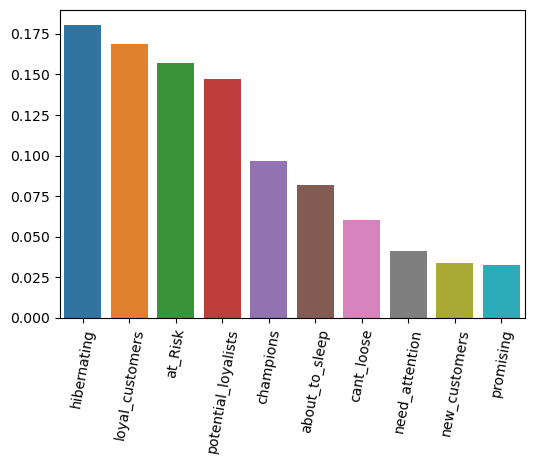

In [58]:
# Value counts of segments
plt.figure(figsize=(6,4))
sns.barplot(data=rfm, x=rfm['segment'].value_counts().index, y=rfm['segment'].value_counts(normalize=True))
plt.xticks(rotation=80)
plt.ylabel(None)
plt.show(block=True)

### <font color='#362FD9'>Example</font>

In [ ]:
# For example if we wanted to access to the customer id's of the women customers at risk.

In [27]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["at_Risk"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) \
              & (df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]

In [ ]:
# Now we can export this cust ids to a csv file if we want.
cust_ids.to_csv("at_risk.csv", index=False)

In [28]:
cust_ids.head()

0     cc294636-19f0-11eb-8d74-000d3a38a36f
1     f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8     cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11    c2e15af2-9eed-11e9-9897-000d3a38a36f
33    fb840306-1219-11ea-a001-000d3a38a36f
Name: master_id, dtype: object

### <font color='#362FD9'>Conclusion</font>

<font color='#2C3333'>Classifying customers and taking action accordingly is a critical process for companies.<br> RFM Analysis helps companies for segmenting their customers by receny, frequency and monetary values.<br> After that, they can decide which customers they are aiming to reach.<br> For example they can take actions for the customers that are in risk and try to make them loyal customers or they can use upsell strategy for the customers that are in champion segment. 
</font>